# SOME BACKGROUND

~ STEP 1 :- First download the latest Python Veriosn 
            https://www.python.org/downloads/

Please Install the downloaded file on your computer using custom Installation settings. 

~ STEP 2 :- After the installation is done , Open  , In MAC - Terminal or WIN - Terminal , and type "Python3 --version"
 for MAC or "Python --version" for WIN and press Enter 

 If , the Terminal , returns with the verion of Python like "Python 3.11.1" , Installation has been succesful , and then we can proceed further , if not , please check if STEP 1 has been accomplished

~STEP 3 :- After we are done  with the STEP 2 , I am using the Jupytr Lab for the tutorials. , type in terminal "pip install jupyter lab" , this will install the latest verison of Jupyter Lab on your system , automatically you will be redirected to the browser 

~ STEP 4 :- To check , if the installation of Jupyter lab has been successful , type "jupyter lab --version" on Terminal. If , the Terminal , returns with the verion of Jupyter Lab like "4.1.2" , Installation has been succesful , and then we can proceed further , if not , please check if STEP 3 has been accomplished

~ STEP 5 :- A library is a collection of code that makes everyday tasks more efficient. For my tutorial i would recommend Installing pandas , numpy - For data analysis , seaborn , matplotlib - For Visualisation.  

Also , i would be Installing a library called "peakutils" , this woulbe be useful for recogisation of Peaks from the Spectra. https://peakutils.readthedocs.io/en/latest/


~ STEP 6 :- For installing the library , go to terminal , and type "pip install pandas" and after installing . Similarly , do this for numpy , seaborn , matplotlin and PeakUtils

~ STEP 7 :- Now , to open the Jupyter Lab seession in the browser , go to terminal and type "jupyter lab" , you will be automatically redirected to the browser in a jupyter lab session. This is where you will start programming . 

NOTE :- To exit the session , press "Ctrl + C" on the termianal , this will end the running session on your system

~ STEP 8 :- In jupyter lab , your lines of codes or chunk of lines of codes  are called as "Cell" , If the "Cell are of type Markdown - Used for Comments / Information " and If the "Cells are of type Code - Used for Programming" 

You can get more in fo here -  https://www.datacamp.com/tutorial/installing-jupyter-notebook


# Importing the Useful librararies. 

Line [1] is completely optional , This is used to Hide the the Warnings in the Output cell. It's recommended to skip the line[1] , and proceed with the code from line[2].

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
###############################################
from peakutils import indexes
from scipy.signal import find_peaks as fp
###############################################
from bokeh.plotting import figure , show

from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

# LOADING THE SPECTRA FILE WHICH WE HAVE

In [3]:
file_path = 'Spectra/CR240LA/1780.csv'

Sample_Spectra = pd.read_csv(file_path)
Sample_Spectra = Sample_Spectra.rename({'intensity':'Intensities'},axis=1)


Sample_Spectra_Plot = figure(title = 'Raw Sample Spectra' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')
Sample_Spectra_Plot.line(Sample_Spectra.wavelength,Sample_Spectra.Intensities , line_width = 2, color ="green" )
Sample_Spectra_Plot.width = 1200
Sample_Spectra_Plot.height = 600

print (Sample_Spectra)
show (Sample_Spectra_Plot)


       wavelength  Intensities
0      180.000000          0.0
1      180.033333          0.0
2      180.066667          0.0
3      180.100000          0.0
4      180.133333          0.0
...           ...          ...
23426  960.866667          0.0
23427  960.900000          0.0
23428  960.933333          0.0
23429  960.966667          0.0
23430  961.000000          0.0

[23431 rows x 2 columns]


Now , as we see in the figure avove , the spectra have lots of lines , which are very specific to the element present in the Sample . 

Each element has an specific , wavelength associated with it.

Now , i have visited the NIST LIBS database , and download the spectra for all the element in the Periodic Table. The File are updated with that of NIST database as of 17 April 2024.

# CHOOSING THE ELEMENT OF INTEREST

In [4]:

element = 'Mo' # ENTER YOUR ELEMENT OF CHOICE
Reference_Spectra = pd.read_csv(r"NIST/" + element +".csv" , encoding = 'windows - 1252' , usecols=(0,1))
print(Reference_Spectra)

Reference_Spectra_Plot = figure(title = 'NIST Reference Library ', x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')
Reference_Spectra_Plot.line(Reference_Spectra.Wavelength,Reference_Spectra.Spectra , line_width = 2, color ="blue" )
Reference_Spectra_Plot.width = 1200
Reference_Spectra_Plot.height = 600

show(Reference_Spectra_Plot)

      Wavelength       Spectra
0         253.27  9.260000e-10
1         253.31  6.100000e-09
2         253.35  3.820000e-08
3         253.39  2.280000e-07
4         253.44  1.990000e-06
...          ...           ...
9839      770.09  4.070000e-09
9840      770.13  2.220000e-09
9841      770.17  1.200000e-09
9842      770.22  5.550000e-10
9843      770.26  2.970000e-10

[9844 rows x 2 columns]


# APPROACH FOR PEAK DETECTION IN THE NIST ELEMENT SPECTRA

Now, uptil now , we have selected the Material Sample ,which we want to Interact with and the data is stored in variable "Sample_Spectra"
Also , we have choosen the element , which we want to detect in this 'Sample_Spectra' , and the spectral information for that element is stored in variable "Reference_Spectra" 

Now , from this 'Reference_Spectra' , Let's try to get all the Peaks this Spectra has

I have used a library called as Peak_Utils 

https://peakutils.readthedocs.io/en/latest/reference.html

The detail of the function is given below. 

---------------------------------------------------------------------------------------------------------------------------

NOTE :- Now if we keep the minimum_distance_1 = 0 and threshold_1 = 0 , we get all the peaks in the spectra , Tuning of these parameter are most important as per your signal.

Setting the value in parameter 'minimum_distance_1' , will allows to skip the peaks , which are very close to each other. 
Setting the value in parameter 'threshold_1', will allows to skip the peaks with low intensity and also seperate the Peaks , with that of noise signal. 

So , its important to choose the value's as per your convenience 

----------------------------------------------------------------------------------------------------------------------------

In [5]:
minimum_distance_1 = 0 
threshold_1 = 0.01 #looking for a value above 0.01% , so that Noise and  Peak with very low Intensities can be ignored 

Reference_Peak = indexes(Reference_Spectra.Spectra , min_dist=minimum_distance_1 , thres=threshold_1) 

Selected_Reference_Spectra = Reference_Spectra.iloc[Reference_Peak] #from the indices , lets try to find the Wavelength and Spectra. 

Reference_Spectra_Peaks = figure(title = 'Peaks in NIST Spectra ', x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')
Reference_Spectra_Peaks.line(Reference_Spectra.Wavelength,Reference_Spectra.Spectra , line_width = 2, color ="blue" )
Reference_Spectra_Peaks.circle(Selected_Reference_Spectra.Wavelength , Selected_Reference_Spectra.Spectra , color = 'red' , size = 8)

Reference_Spectra_Peaks.width = 1200
Reference_Spectra_Peaks.height = 600

print(Selected_Reference_Spectra)
show(Reference_Spectra_Peaks)



      Wavelength     Spectra
36        254.80  10800000.0
81        256.71  29100000.0
158       261.26  67800000.0
199       263.00  65000000.0
223       264.02  74300000.0
...          ...         ...
6938      553.30  52700000.0
7026      557.04  28100000.0
7783      589.23  13500000.0
7868      592.84  17300000.0
8050      603.00  13400000.0

[123 rows x 2 columns]


# Wavelengths for Detected Peak(red circles above)

In [6]:
Reference_Spectra_List = []

for iteam in Selected_Reference_Spectra.Wavelength:
    iteam = float(iteam)
    if iteam > 187.0:        #Only those iteam will be selected , whose wavelength would be greater than 188 nm ,  as our Handheld LIBS range starts from 188nm
        Reference_Spectra_List.append(iteam)
    
print(Reference_Spectra_List) #These are the wavelengths of Peaks , which we are interested in the NIST Spectra
Length_Reference_Spectra_List = (len(Reference_Spectra_List))   #Used for Calculating Percentage Detection

[254.8, 256.71, 261.26, 263.0, 264.02, 264.96, 265.72, 266.49, 267.98, 270.61, 272.53, 273.33, 274.44, 275.16, 276.18, 278.78, 280.05, 282.64, 286.47, 288.64, 290.55, 291.49, 294.59, 297.78, 298.89, 300.08, 301.39, 302.5, 304.2, 304.67, 305.6, 306.41, 307.43, 308.54, 309.47, 310.11, 311.22, 313.26, 314.7, 315.81, 317.04, 318.49, 319.42, 320.74, 322.14, 323.25, 324.82, 325.63, 326.39, 327.03, 328.9, 330.65, 332.52, 334.51, 335.87, 338.43, 340.42, 342.0, 343.61, 344.68, 346.04, 346.89, 348.37, 350.5, 352.12, 354.16, 355.81, 357.05, 358.2, 360.07, 361.13, 362.45, 363.85, 366.02, 368.1, 369.46, 371.93, 372.82, 374.78, 375.84, 376.94, 377.97, 379.84, 383.15, 384.81, 386.43, 390.29, 397.4, 406.24, 407.0, 408.41, 410.7, 412.02, 415.72, 418.78, 423.24, 424.56, 425.29, 427.71, 429.11, 432.6, 438.17, 441.14, 443.48, 444.76, 445.69, 447.44, 453.69, 470.73, 473.12, 476.01, 481.87, 483.02, 486.81, 517.25, 523.96, 536.04, 550.66, 553.3, 557.04, 589.23, 592.84, 603.0]


# 0.0333 is the sprectral resolution of the Handheld LIBS Device

Now , for the two wavelengths from two different data source , to exactly match with each other , is going to be difficult because of the spectral resolution of wavelength - for these two data source are very different from each other.

Now we know that the Spectral Resolution of Handheld LIBS Device is 0.0333. 

Now , we have a list of all wavelengths , detected for Peaks in Reference Spectra , Now for each element lets try to create a min and max of each element in the list. 'Reference_Spectra_Min_Max' is list consisting of a sublist , the sublist have a min and max value or a range of element in the list.


Eg : - A peak of 254.8 in NIST Spectra , can be found at and between [254.7668 ~ 254.8332] in the Handheld LIBS Spectra , because the resolution of wavelength in NIST Spectra and Handheld LIBS Spectra is different. 


In [19]:
Reference_Spectra_Min_Max = []
Reference_Spectra_Min_Max = [[num - 0.0332, num + 0.0332] for num in Reference_Spectra_List]     
    
print(Reference_Spectra_Min_Max)

[[254.76680000000002, 254.8332], [256.67679999999996, 256.7432], [261.22679999999997, 261.2932], [262.9668, 263.0332], [263.98679999999996, 264.0532], [264.92679999999996, 264.9932], [265.6868, 265.75320000000005], [266.4568, 266.52320000000003], [267.9468, 268.01320000000004], [270.5768, 270.64320000000004], [272.49679999999995, 272.5632], [273.29679999999996, 273.3632], [274.4068, 274.4732], [275.1268, 275.19320000000005], [276.1468, 276.21320000000003], [278.74679999999995, 278.8132], [280.0168, 280.08320000000003], [282.60679999999996, 282.6732], [286.4368, 286.50320000000005], [288.60679999999996, 288.6732], [290.5168, 290.58320000000003], [291.4568, 291.52320000000003], [294.55679999999995, 294.6232], [297.74679999999995, 297.8132], [298.85679999999996, 298.9232], [300.04679999999996, 300.1132], [301.35679999999996, 301.4232], [302.4668, 302.5332], [304.16679999999997, 304.2332], [304.6368, 304.70320000000004], [305.5668, 305.63320000000004], [306.3768, 306.44320000000005], [307.

Once we have got the range for the Reference Spectra , where the Element  Spectra can be expected. Now let's try to find all the peak of the 'Sample_Spectra' , Here also tuning of the paramters are important as per you analysis
-------------------------------------------------------------------------------------------------------------------------------

In [8]:
# METHOD 1 - PeakUtils

# minimum_distance_2 = 0  #Minimum distance between each detected peak. The peak with the highest amplitude is preferred to satisfy this constraint.
# threshold_2 = 0.05 #looking for a value above 5% , so that Noise and  Peak with very low Intensities can be ignored, absolute heights considered.

# Sample_Peak = indexes(Sample_Spectra.Intensities , min_dist=minimum_distance_2 , thres=threshold_2) 
# Sample_Peak #Return the indices in the form of the list


####################################################################################################################################################

#METHOD 2 - Scipy 

height_2 = None
Peak_Prominenace = 500 #Uses S/N ratio , as comapred to other peaks
minimum_distance_3 = None   #minimum distance between two peaks

Sample_Peak , _ = fp(Sample_Spectra.Intensities,height=height_2,prominence=Peak_Prominenace,distance=minimum_distance_3)
Sample_Peak



array([  393,   571,   678,   723,   787,   793,   811,   837,   861,
         891,   900,   908,   913,  1016,  1720,  1746,  2035,  2106,
        2273,  2325,  2398,  2426,  2869,  2912,  2986,  3002,  3655,
        3708,  3817,  3827,  3846,  3878,  4077,  4138,  4446,  4507,
        4636,  6388,  6401,  6412,  6432,  6485,  6505,  6516,  7280,
        8630,  8641,  8768,  9031,  9338,  9375, 12270, 12287, 13688,
       13917, 13988, 14288, 15497, 15803, 16042, 16420, 16753, 17112,
       17144, 17361, 17490, 17505, 17772, 17916, 18444, 18618, 18644,
       18910, 18945, 19392, 19823, 19872, 20162, 21967, 22272])

In [9]:
Selected_Sample_Spectra = Sample_Spectra.iloc[Sample_Peak] 
Selected_Sample_Spectra

,wavelength,Intensities
393,193.100000,4800.257819
571,199.033333,845.727836
678,202.600000,23728.538916
723,204.100000,1564.552626
787,206.233333,24348.784796
...,...,...
19823,840.766667,4367.815414
19872,842.400000,5744.775443
20162,852.066667,1971.636666
21967,912.233333,2852.261531


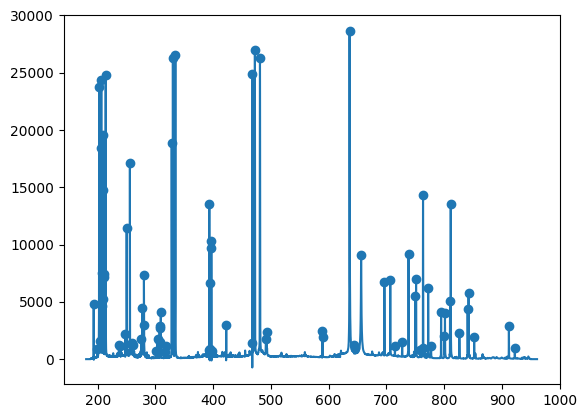

In [10]:
plt.plot(Sample_Spectra.wavelength , Sample_Spectra.Intensities) #plot a nomral ,x ,y plot)
plt.scatter(Selected_Sample_Spectra.wavelength,Selected_Sample_Spectra.Intensities)

Now , lets try to create an list , lets fill the list , with all the detected peaks wavelengths of the sample spectra.

Remember , Sample Spectra , has all the element within like Al , Fe , Cu , Mn , Mo etc)


In [11]:
Sample_Spectra_Wavelength = Sample_Spectra.iloc[Sample_Peak]

Sample_Spectra_List = []

for iteam in Sample_Spectra_Wavelength.wavelength:
    iteam = float(iteam)
    Sample_Spectra_List.append(iteam)
    
print(Sample_Spectra_List)


[193.09999999999928, 199.03333333333225, 202.59999999999872, 204.09999999999863, 206.23333333333184, 206.43333333333183, 207.0333333333318, 207.8999999999984, 208.6999999999984, 209.6999999999983, 209.9999999999983, 210.26666666666492, 210.4333333333316, 213.86666666666477, 237.33333333333007, 238.1999999999967, 247.83333333332948, 250.199999999996, 255.7666666666624, 257.4999999999969, 259.93333333333214, 260.8666666666662, 275.63333333334464, 277.0666666666791, 279.53333333334774, 280.0666666666815, 301.8333333333655, 303.6000000000336, 307.2333333333698, 307.5666666667034, 308.2000000000372, 309.26666666670474, 315.9000000000433, 317.9333333333783, 328.20000000005314, 330.2333333333881, 334.5333333333915, 392.933333333438, 393.36666666677166, 393.7333333334386, 394.4000000001058, 396.1666666667739, 396.8333333334411, 397.2000000001081, 422.666666666795, 467.6666666668308, 468.03333333349775, 472.26666666683445, 481.0333333335081, 491.2666666668496, 492.5000000001839, 589.00000000012

# So far so now , i have two list with me 

1) Sample_Spectra_List = Containg wavelngths of all Peaks from data of Handheld LIBS device
2) Reference_Spectra_Min_Max = Containing a range of wavelength , for all the peak detected in the Reference Sample

   

In [12]:
print(Sample_Spectra_List)

[193.09999999999928, 199.03333333333225, 202.59999999999872, 204.09999999999863, 206.23333333333184, 206.43333333333183, 207.0333333333318, 207.8999999999984, 208.6999999999984, 209.6999999999983, 209.9999999999983, 210.26666666666492, 210.4333333333316, 213.86666666666477, 237.33333333333007, 238.1999999999967, 247.83333333332948, 250.199999999996, 255.7666666666624, 257.4999999999969, 259.93333333333214, 260.8666666666662, 275.63333333334464, 277.0666666666791, 279.53333333334774, 280.0666666666815, 301.8333333333655, 303.6000000000336, 307.2333333333698, 307.5666666667034, 308.2000000000372, 309.26666666670474, 315.9000000000433, 317.9333333333783, 328.20000000005314, 330.2333333333881, 334.5333333333915, 392.933333333438, 393.36666666677166, 393.7333333334386, 394.4000000001058, 396.1666666667739, 396.8333333334411, 397.2000000001081, 422.666666666795, 467.6666666668308, 468.03333333349775, 472.26666666683445, 481.0333333335081, 491.2666666668496, 492.5000000001839, 589.00000000012

In [13]:
print(Reference_Spectra_Min_Max)

[[254.76668, 254.83332000000001], [256.67668, 256.74332], [261.22668, 261.29332], [262.96668, 263.03332], [263.98668, 264.05332], [264.92668, 264.99332], [265.68668, 265.75332000000003], [266.45668, 266.52332], [267.94668, 268.01332], [270.57668, 270.64332], [272.49667999999997, 272.56332], [273.29668, 273.36332], [274.40668, 274.47332], [275.12668, 275.19332], [276.14668, 276.21332], [278.74667999999997, 278.81332], [280.01668, 280.08332], [282.60668, 282.67332], [286.43668, 286.50332000000003], [288.60668, 288.67332], [290.51668, 290.58332], [291.45668, 291.52332], [294.55668, 294.62332], [297.74667999999997, 297.81332], [298.85668, 298.92332], [300.04668, 300.11332], [301.35668, 301.42332], [302.46668, 302.53332], [304.16668, 304.23332], [304.63668, 304.70332], [305.56668, 305.63332], [306.37668, 306.44332], [307.39668, 307.46332], [308.50668, 308.57332], [309.43668, 309.50332000000003], [310.07668, 310.14332], [311.18668, 311.25332000000003], [313.22668, 313.29332], [314.66668, 314

# Finally , My  idea is see , if each iteam in (Reference_Spectra_Min_Max) , matches with each element in (Sample_Spectra_List) , and then caluclate the exact matching Percentage 


In [14]:
plot_spectra_wavelength_list=[]
plot_reference_wavelength_list = []
count = 0
for cell in Reference_Spectra_Min_Max: 
    for iteam in Sample_Spectra_List:
        if iteam >= cell[0] and iteam <= cell[1]:
            count = count + 1 #for counting
            plot_spectra_wavelength_list.append(iteam)
            plot_reference_wavelength_list.append(cell[0] + 0.0333)

plot_spectra_intensities_list=[]
for iteam in plot_spectra_wavelength_list:
    Inte = Selected_Sample_Spectra.loc[Selected_Sample_Spectra['wavelength'] == iteam, 'Intensities'].iloc[0]
    plot_spectra_intensities_list.append(Inte)
#print(plot_spectra_intensities_list)

#print(plot_spectra_wavelength_list)

print('The total peaks detected were ' + str(count) + '\n' )

print('The following peaks , for Reference Sample was detected  :- '  )
print(plot_reference_wavelength_list )

print('\n')
print('The Sample Peaks detected from the sample were:-')
spectra_df = pd.DataFrame({'wavelength': plot_spectra_wavelength_list, 'intensities': plot_spectra_intensities_list})
print(spectra_df)  

The total peaks detected were 2

The following peaks , for Reference Sample was detected  :- 
[280.04998, 334.50998]


The Sample Peaks detected from the sample were:-
   wavelength   intensities
0  280.066667   7320.109172
1  334.533333  26533.855573


# RESULTS

In [15]:
percentage = (count / Length_Reference_Spectra_List) * 100
percentage

print (' Ananlysis of ' + element + ' was done , and the ' + str(count) +  ' number of spectral lines from the material sample ' + ' matched with the ' + str(Length_Reference_Spectra_List) + ' choosen Reference element of '+ element + ' therefore , we can say' ,  str(percentage) + '%' + ' matched as per the parameters set by the user')

 Ananlysis of Mo was done , and the 2 number of spectral lines from the material sample  matched with the 123 choosen Reference element of Mo therefore , we can say 1.6260162601626018% matched as per the parameters set by the user


Find the Correponding Intensities , for the wavelengths available in "plot_spectra_wavelength_list" and also for the wavelengths available in "plot_refernce_intensities_list"

# Generate a Interactive Plot

In [16]:
p = figure(title = 'Peak Detection' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensities')
p.line(Sample_Spectra.wavelength,Sample_Spectra.Intensities , line_width = 2, color ="red" )
p.circle(spectra_df.wavelength, spectra_df.intensities , color = 'green' , size = 12)

p.width = 1200
p.height = 600

show(p)

